#Predicting Carbon Dioxide Emission of a New Car Model based on its Engine Size using Polynomial Regression

In this, we learn how to use scikit-learn to implement SIMPLE LINEAR REGRESSION. We have to download a dataset that is related to Fuel Consumption and CO2EMISSION of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate a model using test set and at the end finally use model to predict unknown value.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


##Downloading the Data

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-04 07:14:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2020-10-04 07:14:23 (1.33 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



##Read the Data

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##Data Exploration

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


###Select some features that we want to use for regression.

In [ ]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


##Ploting Various Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc0647940>,
      dtype=object)

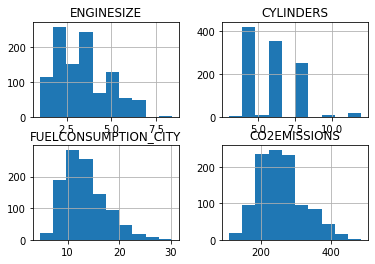

In [ ]:
cdf.hist()

##Plotting CO2 Emissions vs Engine Size

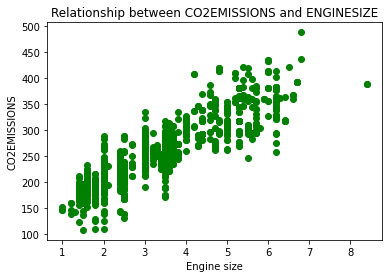

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("CO2EMISSIONS")
plt.title('Relationship between CO2EMISSIONS and ENGINESIZE')
plt.show()

##Splitting Data into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X = cdf[["ENGINESIZE"]]
y = cdf[["CO2EMISSIONS"]]
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

#Polynomial Regression

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures( degree = 2 )
train_x_poly = poly.fit_transform(X_train)
test_x_poly = poly.fit_transform(X_test)



In [ ]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, y_train)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.44724505 -1.34988027]]
Intercept:  [109.857053]


##Plot the curve over the data

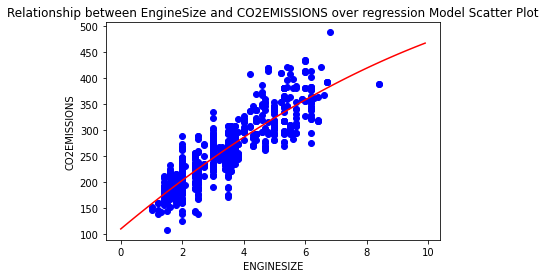

In [ ]:
plt.scatter(X_train.ENGINESIZE, y_train.CO2EMISSIONS, color ='blue')
plt.xlabel ("ENGINESIZE")
plt.ylabel ("CO2EMISSIONS")
plt.title ('Relationship between EngineSize and CO2EMISSIONS over regression Model Scatter Plot')
x = np.arange(0.0, 10.0, 0.1)
y = clf.intercept_[0] + clf.coef_[0][1]*x + clf.coef_[0][2]*np.power(x,2)
plt.plot(x, y , '-r')

##Predicting CO2 Emission for given Features

In [ ]:
clf.predict([[0, 8.5, 57.25]])

array([[452.87799038]])

##Accuracy of a Model

In [ ]:
clf.score(test_x_poly, y_test)

0.7237141291367732

#Evalution

In [ ]:
from sklearn.metrics import r2_score

test_y1 = clf.predict(test_x_poly)

print("Mean absolute error = CO2EMISSIONS %.2f" % np.mean(np.absolute(test_y1 - y_test)))
print("Residual sum of squares (MSE) = CO2EMISSIONS %.2f" % np.mean((test_y1 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y1 , y_test) )

Mean absolute error = CO2EMISSIONS 25.51
Residual sum of squares (MSE) = CO2EMISSIONS 1166.34
R2-score: 0.64


##Thanks
NoteBook Created By: Manav Gandhi